## STAT3612: Statistical Machine Learning
### Assignment 2: Classification
### DUE: Nov 10, 2024, Sunday, 11:59 PM

In [1]:
! pip install numpy pandas matplotlib scikit-learn keras

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/14.8 MB 8.4 MB/s eta 0:00:02
   --------------------- ------------------ 8.1/14.8 MB 20.2 MB/s eta 0:00:01
   ------------------------------------ --- 13.6/14.8 MB 22.0 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.


In [10]:
import numpy as np
from sklearn.datasets import fetch_openml, load_digits
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle



In [2]:
# Q7 (a)

# ------------------
# Write your code here
# Load the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=13)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train[0])

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make prediction and access accuracy
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Data Accuracy: {accuracy * 100:.2f}%")

# ------------------

c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(60000, 784)
(10000, 784)
(60000,)
3
Testing Data Accuracy: 86.21%


In [ ]:
# Q7 (b)

# ------------------
# Write your code here
# Apply filter
y_7b = y[(y==0) | (y==1)]
X_7b = X[(y==0) | (y==1)]

X_train_7b, X_test_7b, y_train_7b, y_test_7b = train_test_split(X_7b, y_7b, test_size=0.2, random_state=13)

# Initialize LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_7b, y_train_7b)

y_pred_7b = lda.predict(X_test_7b)

# Compute metrics and display results
precision = precision_score(y_test_7b, y_pred_7b)
recall = recall_score(y_test_7b, y_pred_7b)
f1 = f1_score(y_test_7b, y_pred_7b)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
# ------------------

Precision: 0.9950
Recall: 0.9944
F1-Score: 0.9947
Accuracy: 0.9942


In [14]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalise pixel values to [0,1]
X_train = X_train / 255
X_test = X_test / 255

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


Consider flatten the images to 1D vectors and make the shape of the X be (Batch, dim).

In [ ]:
# Q8 (a)

# ------------------
# Write your code here
# FLatten images to 1D vector
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalise pixel values to [0,1]
X_train = X_train / 255
X_test = X_test / 255

print(X_train)

# Standardize the data since L1 penalty is to be used. 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a range of regularization strengths (C values)
C_values = np.logspace(-2, 2, 5)  # Logarithmic range from 1e-4 to 1e4
print(C_values)
accuracies = []

# Train and evaluate the model for each C value
for C in C_values:
    print(f"Training with C={C:.4f}...")
    model = LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        penalty="l1",
        C=C,  # Inverse of regularization strength in sklearn
        max_iter=100,
        random_state=42,
        warm_start=True,
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy:.4f}")
    
# ------------------

X_train shape: (50000, 3072)
X_test shape: (10000, 3072)
[[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.1372549  0.69803922 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.74117647 0.82745098 0.94117647 ... 0.76470588 0.74509804 0.67058824]
 [0.89803922 0.89803922 0.9372549  ... 0.63921569 0.63921569 0.63137255]]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
Training with C=0.0100...


c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.4025
Training with C=0.1000...


c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.4124
Training with C=1.0000...


c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.3923
Training with C=10.0000...


c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.3895
Training with C=100.0000...


c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.3898


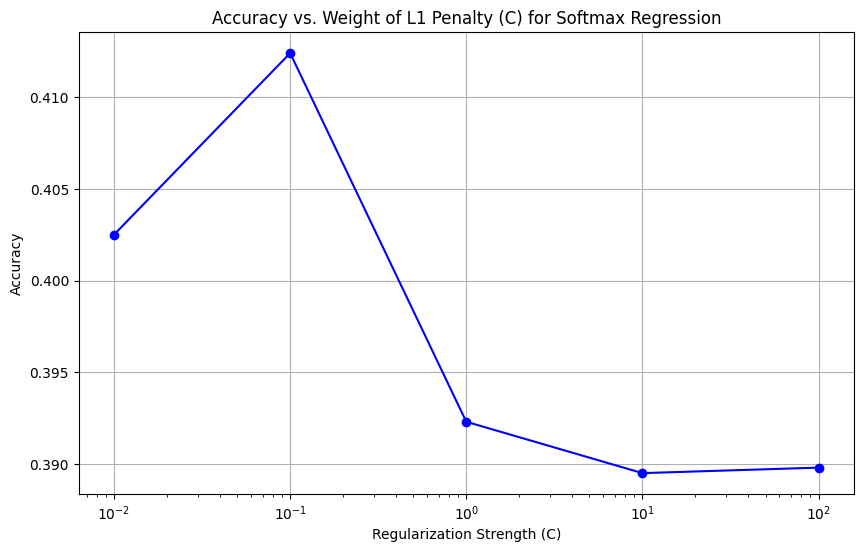

In [4]:
# Plot the accuracy vs. weight of the L1 penalty
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Use logarithmic scale for C values
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Weight of L1 Penalty (C) for Softmax Regression")
plt.grid(True)
plt.show()

The L1 penalty term is defined as:

$
{L}_{\text{L1}} = \lambda \|\mathbf{W}\|_1 = \lambda \sum_{i,j} |w_{ij}|
$

The gradient of the L1 penalty with respect to the weights is:

$
\nabla_{\mathbf{W}} \mathcal{L}_{\text{L1}} = \lambda \cdot \text{sign}(\mathbf{W})
$

, where $\text{sign}(\mathbf{W})$ is the element-wise sign of the weight matrix.

In [54]:
# Q8 (b)
np.random.seed(0)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 1, keepdims=True)

def sgd_step(w, X_train_mini, y_train_mini, lr, minibatch_size, lambda_l1):
    """
    Perform a single step of Stochastic Gradient Descent (SGD) to update the weight matrix with L1 regularization.

    Parameters:
    w: ndarray
        Weight matrix of the model. This is the parameter we want to update.
    X_train_mini: ndarray
        A mini-batch of training data. Each row corresponds to a training example, and each column corresponds to a feature.
    y_train_mini: ndarray
        One-hot encoded labels for the mini-batch. Each row is the label for the corresponding training example.
    lr: float
        Learning rate for the gradient descent step.
    minibatch_size: int
        The size of the mini-batch used in the update step.
    lambda_l1: float
        Regularization strength for the L1 penalty.

    Returns:
    w: ndarray
        Updated weight matrix after the SGD step.
    """
    # Compute the gradient of the cross-entropy loss with respect to the weights
    dw = (softmax((w @ X_train_mini.T).T).T - y_train_mini.T) @ X_train_mini / minibatch_size

    # Add the gradient of the L1 regularization term
    dw += lambda_l1 * np.sign(w)

    # Update the weights by subtracting the learning rate times the gradient
    w = w - lr * dw

    # Return the updated weight matrix
    return w

def sgd(w, X_train, y_train, lr, lambda_l1, minibatch_size=64):
    """
    Perform Stochastic Gradient Descent (SGD) over the entire dataset with L1 regularization.

    Parameters:
    w: ndarray
        Weight matrix of the model. This is the parameter we want to update.
    X_train: ndarray
        Training data. Each row corresponds to a training example, and each column corresponds to a feature.
    y_train: ndarray
        One-hot encoded labels for the training data. Each row is the label for the corresponding training example.
    lr: float
        Learning rate for the gradient descent step.
    minibatch_size: int, optional
        The size of the mini-batch used in each update step. Default is 64.
    lambda_l1: float, optional
        Regularization strength for the L1 penalty. Default is 0.01.

    Returns:
    w: ndarray
        Updated weight matrix after processing the entire training data using SGD.
    """
    # Shuffle the dataset to ensure that the mini-batches are selected randomly in each epoch
    X_train, y_train = shuffle(X_train, y_train)

    # Iterate over the dataset in mini-batches
    for i in range(0, X_train.shape[0], minibatch_size):
        # Extract the current mini-batch from the training data
        X_train_mini = X_train[i:i + minibatch_size]
        # Extract the corresponding mini-batch of labels
        y_train_mini = y_train[i:i + minibatch_size]

        # Perform a single SGD step to update the weights using the mini-batch
        w = sgd_step(w, X_train_mini, y_train_mini, lr, minibatch_size, lambda_l1)

    # Return the updated weights after all mini-batches have been processed
    return w

def train_with_SGD(model, X_train, y_train, lr, epoch_num, lambda_l1):
    """
    Train the model using Stochastic Gradient Descent (SGD) with L1 regularization.

    Parameters:
    model: dict
        Dictionary containing the weight matrix.
    X_train: ndarray
        Training data. Each row corresponds to a training example, and each column corresponds to a feature.
    y_train: ndarray
        One-hot encoded labels for the training data. Each row is the label for the corresponding training example.
    lr: float
        Learning rate for the gradient descent step.
    epoch_num: int
        Number of epochs to train the model.
    lambda_l1: float
        Regularization strength for the L1 penalty.

    Returns:
    model: dict
        Updated model after training.
    """
    # Extract the weight matrix from the model
    w = model['w']

    # Train the model for the specified number of epochs
    for epoch in range(epoch_num):
        w = sgd(w, X_train, y_train, lr, lambda_l1=lambda_l1)
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epoch_num}")

    # Update the model with the trained weights
    model['w'] = w
    return model


def test(model, X_test, y_test):
    """
    Evaluate the model on the test set.

    Parameters:
    model: dict
        Dictionary containing the model parameters (e.g., weight matrix).
    X_test: ndarray
        Test data. Each row corresponds to a test example, and each column corresponds to a feature.
    y_test: ndarray
        One-hot encoded labels for the test data. Each row is the label for the corresponding test example.

    Returns:
    accuracy: float
        Accuracy of the model on the test set.
    """
    # Extract the weight matrix from the model
    w = model['w']

    # Compute the predicted probabilities
    scores = np.dot(X_test, w.T)
    y_pred = np.argmax(scores, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Compute the accuracy
    accuracy = np.mean(y_pred == y_true)
    return accuracy


# ------------------
# Write your code here
# One-hot encode labels
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.fit_transform(y_test.reshape(-1, 1))


# Initialize the model
n_features = X_train.shape[1]
n_classes = y_train.shape[1]
model = {'w': np.random.randn(n_classes, n_features) * 0.01}

# Train the model
model = train_with_SGD(model, X_train, y_train_onehot, lr=0.002, epoch_num=100, lambda_l1=0.00005)

# Test the model
accuracy = test(model, X_test, y_test_onehot)
print(f"Test Accuracy: {accuracy:.4f}")

# ------------------

c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 10/100
Epoch 20/100
Epoch 30/100
Epoch 40/100
Epoch 50/100
Epoch 60/100
Epoch 70/100
Epoch 80/100
Epoch 90/100
Epoch 100/100
Test Accuracy: 0.4031


Class with highest accuracy: 0


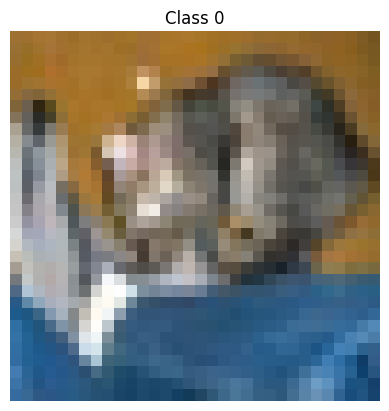

In [55]:
# Find the class with the highest accuracy
class_accuracies = []
for k in range(n_classes):
    mask = np.argmax(y_test, axis=1) == k
    class_accuracies.append(np.mean(y_pred[mask] == k))

best_class = np.argmax(class_accuracies)
print(f"Class with highest accuracy: {best_class}")

# Visualize an image from the best class
best_class_indices = np.where(np.argmax(y_test, axis=1) == best_class)[0]
sample_index = best_class_indices[0]
sample_image = X_test[sample_index].reshape(32, 32, 3)

plt.imshow(sample_image)
plt.title(f"Class {best_class}")
plt.axis("off")
plt.show()